In [66]:
# Import modules

import pandas as pd
import numpy as np
import os
from datetime import datetime

from shapely.geometry import Point, Polygon
from shapely import wkt

pd.set_option('display.max_columns', None)

# 1) Store locations:

In [3]:
stores = pd.read_csv('../assignment_data/stores.csv')
stores.head()

,store_id,store_name,wkt
0,place_1,McDonald's,POLYGON ((13.4611920000000005 52.4709870000000...
1,place_2,McDonald's,POLYGON ((13.4683480000000007 52.5471599999999...
2,place_3,McDonald's,POLYGON ((13.3128810000000009 52.4197929999999...
3,place_4,McDonald's,POLYGON ((13.3635780000000004 52.5606039999999...
4,place_5,McDonald's,POLYGON ((13.3230909999999998 52.5613460000000...


In [3]:
type(stores.iloc[0,2])

str

Change 'wkt' data type to Shapely Geometry to enable plotting of store locations:

In [4]:
stores['wkt'] = stores['wkt'].apply(wkt.loads)

In [5]:
type(stores.iloc[0,2])

shapely.geometry.polygon.Polygon

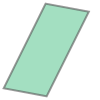

In [6]:
place1 = stores.iloc[0,2]
place1

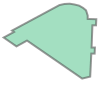

In [7]:
place12 = stores.iloc[11,2]
place12

# 2.1) User GPS locations (testing on one chunk):

In [9]:
# Chunk 1 of 57
user1 = pd.read_csv('../assignment_data/sample_data/sample_data/part_1.csv')
user1.head()

,device_id,lat,lon,utc_timestamp
0,21166,52.554763,13.453171,1609497048000
1,22514,52.514669,13.190656,1609488545000
2,19025,52.431905,13.470953,1609532504000
3,21728,52.502707,13.365311,1609466908000
4,5646,52.479403,13.423215,1609509862000


Combine 'lat' and 'lon' columns to create a Shapely Geometry column to enable plotting of GPS locations:

In [10]:
user1['gps_position'] = user1.apply(lambda row: Point(row['lon'], row['lat']), axis=1)

In [10]:
user1.head()

,device_id,lat,lon,utc_timestamp,gps_position
0,21166,52.554763,13.453171,1609497048000,POINT (13.4531708 52.55476280000001)
1,22514,52.514669,13.190656,1609488545000,POINT (13.1906557 52.5146689)
2,19025,52.431905,13.470953,1609532504000,POINT (13.470953 52.43190500000001)
3,21728,52.502707,13.365311,1609466908000,POINT (13.365311 52.502707)
4,5646,52.479403,13.423215,1609509862000,POINT (13.4232152 52.4794033)


In [11]:
type(user1.iloc[0,4])

shapely.geometry.point.Point

Loop through user chunk DF & store list to see if any GPS flags appear inside the shop polygons:

In [13]:
for point, user in zip(user1['gps_position'], user1['device_id']):
    for polygon in stores['wkt']:
        if point.within(polygon) == True:
            print(user)

6790
13577
8549
9288
7144
23806
18223
8753
21173


Adapt code above to create a new DF with a new row for each time a GPS position is flagged as within a store:

Columns: date | store_name | store_id | device_id | gps_position

In [15]:
flagged_rows = []
for point, user, time in zip(user1['gps_position'], user1['device_id'], user1['utc_timestamp']):
    for store_id, store_name, polygon in zip(stores['store_id'], stores['store_name'], stores['wkt']):
        if point.within(polygon) == True:
            flagged_rows.append([time, store_name, store_id, user, point])

In [16]:
flagged_df = pd.DataFrame(flagged_rows, columns=['date', 'store_name', 'store_id', 'device_id', 'gps_location'])
flagged_df

,date,store_name,store_id,device_id,gps_location
0,1609535794000,McDonald's,place_25,6790,POINT (13.5471486 52.4318503)
1,1609517160000,McDonald's,place_29,13577,POINT (13.388066 52.519994)
2,1609495691000,Rewe,place_141,8549,POINT (13.2439761 52.6149546)
3,1609520578000,McDonald's,place_25,9288,POINT (13.54691 52.43191899999999)
4,1609513267000,McDonald's,place_18,7144,POINT (13.59309 52.44798)
5,1609533499000,McDonald's,place_17,23806,POINT (13.6236079 52.5045062)
6,1609535728000,Rewe,place_161,18223,POINT (13.50841 52.4506)
7,1609520482000,Burger King,place_43,8753,POINT (13.2321998 52.52722610000001)
8,1609541886000,McDonald's,place_26,21173,POINT (13.465008 52.436258)


Improve section above using list comprehension:

In [18]:
flagged_rows_comp = [[time, store_name, store_id, user, point] for point, user, time in zip(
    user1['gps_position'], user1['device_id'], user1['utc_timestamp']) for store_id, store_name, polygon in zip(
    stores['store_id'], stores['store_name'], stores['wkt']) if point.within(polygon) == True]

In [19]:
flagged_df_comp = pd.DataFrame(flagged_rows_comp, columns=['date', 'store_name', 'store_id', 'device_id', 'gps_location'])
flagged_df_comp

,date,store_name,store_id,device_id,gps_location
0,1609535794000,McDonald's,place_25,6790,POINT (13.5471486 52.4318503)
1,1609517160000,McDonald's,place_29,13577,POINT (13.388066 52.519994)
2,1609495691000,Rewe,place_141,8549,POINT (13.2439761 52.6149546)
3,1609520578000,McDonald's,place_25,9288,POINT (13.54691 52.43191899999999)
4,1609513267000,McDonald's,place_18,7144,POINT (13.59309 52.44798)
5,1609533499000,McDonald's,place_17,23806,POINT (13.6236079 52.5045062)
6,1609535728000,Rewe,place_161,18223,POINT (13.50841 52.4506)
7,1609520482000,Burger King,place_43,8753,POINT (13.2321998 52.52722610000001)
8,1609541886000,McDonald's,place_26,21173,POINT (13.465008 52.436258)


This appears to work correctly, now to repeat the process for each chunk:

# 2.1) User GPS locations (all chunks):

Loop through CSV files in directory, adding rows to DF each time a GPS position is flagged as within a store:

In [21]:
for filename in os.listdir('../assignment_data/sample_data/sample_data'):
    if filename.endswith(".csv"):
        user_chunk = pd.read_csv(f'../assignment_data/sample_data/sample_data/{filename}')
        user_chunk['gps_position'] = user_chunk.apply(lambda row: Point(row['lon'], row['lat']), axis=1)
        flagged_rows_comp = [[time, store_name, store_id, user, point] for point, user, time in zip(
            user_chunk['gps_position'], user_chunk['device_id'], user_chunk['utc_timestamp']) for store_id, store_name, polygon in zip(
            stores['store_id'], stores['store_name'], stores['wkt']) if point.within(polygon) == True]
        flagged_df_comp = pd.DataFrame(flagged_rows_comp, columns=['date', 'store_name', 'store_id', 'device_id', 'gps_location'])

In [22]:
flagged_df_comp

,date,store_name,store_id,device_id,gps_location
0,1609764325000,Kaufland,place_225,27224,POINT (13.3679124 52.4621811)
1,1609761052000,Kaufland,place_225,27224,POINT (13.3675209 52.4612456)
2,1609761163000,Rewe,place_162,61715,POINT (13.49927 52.43994)
3,1609762243000,Aldi,place_58,36856,POINT (13.484251 52.52250160000001)
4,1609767649000,Rewe,place_179,32256,POINT (13.56899 52.52829000000001)
...,...,...,...,...,...
58,1609763101000,Rewe,place_179,32256,POINT (13.56889 52.52826999999999)
59,1609775897000,Rewe,place_173,36625,POINT (13.354856 52.412764)
60,1609754059000,Kaufland,place_225,58848,POINT (13.3676775 52.46131310000001)
61,1609719453000,Rewe,place_210,61577,POINT (13.2240282 52.4130297)


63 results doesn't seem like enough, to double check I will add a 'print' instruction that will print out the number of GPS locations flagged per chunk:

In [54]:
for filename in os.listdir('../assignment_data/sample_data/sample_data'):
    if filename.endswith(".csv"):
        # DO THE STUFF
        user_chunk = pd.read_csv(f'../assignment_data/sample_data/sample_data/{filename}')
        user_chunk['gps_position'] = user_chunk.apply(lambda row: Point(row['lon'], row['lat']), axis=1)
        flagged_rows_comp = [[time, store_name, store_id, user, point] for point, user, time in zip(
            user_chunk['gps_position'], user_chunk['device_id'], user_chunk['utc_timestamp']) for store_id, store_name, polygon in zip(
            stores['store_id'], stores['store_name'], stores['wkt']) if point.within(polygon) == True]
        flagged_df_comp = pd.DataFrame(flagged_rows_comp, columns=['date', 'store_name', 'store_id', 'device_id', 'gps_location'])
        print(len(flagged_df_comp))

9
64
56
57
39
69
24
55
63
43
75
16
63
80
58
59
8
16
20
34
39
47
52
43
52
45
33
63
39
54
62
72
57
75
73
82
86
64
8
19
53
39
48
47
32
52
52
41
43
62
56
62
31
3
22
68
63


This tells me that after iterating through all the CSV files in the directory, the DF should be 2747 rows long. Therefore, the previous attempt was wrong, it only included the rows from Chunk #57.

Solution is to create a mini DF for each chunk and then concat that on to the main DF:

In [57]:
combined_flagged_df = pd.DataFrame()

for filename in os.listdir('../assignment_data/sample_data/sample_data'):
    if filename.endswith(".csv"):
        # DO THE STUFF
        user_chunk = pd.read_csv(f'../assignment_data/sample_data/sample_data/{filename}')
        user_chunk['gps_position'] = user_chunk.apply(lambda row: Point(row['lon'], row['lat']), axis=1)
        flagged_rows_comp = [[time, store_name, store_id, user, point] for point, user, time in zip(
            user_chunk['gps_position'], user_chunk['device_id'], user_chunk['utc_timestamp']) for store_id, store_name, polygon in zip(
            stores['store_id'], stores['store_name'], stores['wkt']) if point.within(polygon) == True]
        flagged_df_comp = pd.DataFrame(flagged_rows_comp, columns=['date', 'store_name', 'store_id', 'device_id', 'gps_location'])
        combined_flagged_df = pd.concat([combined_flagged_df, flagged_df_comp], axis=0)

In [58]:
combined_flagged_df

,date,store_name,store_id,device_id,gps_location
0,1609535794000,McDonald's,place_25,6790,POINT (13.5471486 52.4318503)
1,1609517160000,McDonald's,place_29,13577,POINT (13.388066 52.519994)
2,1609495691000,Rewe,place_141,8549,POINT (13.2439761 52.6149546)
3,1609520578000,McDonald's,place_25,9288,POINT (13.54691 52.43191899999999)
4,1609513267000,McDonald's,place_18,7144,POINT (13.59309 52.44798)
...,...,...,...,...,...
58,1609763101000,Rewe,place_179,32256,POINT (13.56889 52.52826999999999)
59,1609775897000,Rewe,place_173,36625,POINT (13.354856 52.412764)
60,1609754059000,Kaufland,place_225,58848,POINT (13.3676775 52.46131310000001)
61,1609719453000,Rewe,place_210,61577,POINT (13.2240282 52.4130297)


2747 rows confirms that the solution has worked correctly.

Export DF to CSV file:

In [59]:
#combined_flagged_df = combined_flagged_df.to_csv('../results/combined_sample_flags.csv', index=False)

# 2.3) User GPS locations (full dataset):

In [9]:
combined_flagged_df = pd.DataFrame()

for filename in os.listdir('../assignment_data/full_data/full_data'):
    if filename.endswith(".csv"):
        # DO THE STUFF
        user_chunk = pd.read_csv(f'../assignment_data/full_data/full_data/{filename}')
        user_chunk['gps_position'] = user_chunk.apply(lambda row: Point(row['lon'], row['lat']), axis=1)
        flagged_rows_comp = [[time, store_name, store_id, user, point] for point, user, time in zip(
            user_chunk['gps_position'], user_chunk['device_id'], user_chunk['utc_timestamp']) for store_id, store_name, polygon in zip(
            stores['store_id'], stores['store_name'], stores['wkt']) if point.within(polygon) == True]
        flagged_df_comp = pd.DataFrame(flagged_rows_comp, columns=['date', 'store_name', 'store_id', 'device_id', 'gps_location'])
        combined_flagged_df = pd.concat([combined_flagged_df, flagged_df_comp], axis=0)

In [10]:
combined_flagged_df

,date,store_name,store_id,device_id,gps_location
0,1609504091000,McDonald's,place_28,838,POINT (13.3863778 52.52029889999999)
1,1609526776000,Rewe,place_198,1597,POINT (13.3697391 52.5239484)
2,1609514684000,McDonald's,place_14,1620,POINT (13.3078575 52.6356204)
3,1609459427000,Mercedes,place_233,2022,POINT (13.439094 52.505726)
4,1609508741000,Kaufland,place_215,2317,POINT (13.2192194 52.537559)
...,...,...,...,...,...
1484,1609772097000,Lexus,place_245,43335,POINT (13.520654 52.526376)
1485,1609772318000,Aldi,place_124,43343,POINT (13.514526 52.6405914)
1486,1609774542000,Lexus,place_245,43335,POINT (13.520568 52.526127)
1487,1609778427000,Lexus,place_245,43335,POINT (13.520101 52.52622)


Export DF to CSV file:

In [11]:
#combined_flagged_df = combined_flagged_df.to_csv('../results/combined_full_flags.csv', index=False)

# 3.1) Affinity data (testing on one affinity):

In [12]:
affinity_df = pd.read_csv('../assignment_data/affinities/addidas', header=None, names=['addidas'])
affinity_df

,addidas
0,50844
1,90618
2,97745
3,45843
4,164807
...,...
6771,112211
6772,112457
6773,77740
6774,50930


Create list of device IDs related to affinity:

In [13]:
affinity_list = list(affinity_df.iloc[:, 0])
affinity_list

[50844,
 90618,
 97745,
 45843,
 164807,
 106524,
 77325,
 95037,
 61826,
 77798,
 44321,
 47657,
 90341,
 28915,
 62573,
 5308,
 61683,
 81358,
 143256,
 5521,
 115075,
 92670,
 107756,
 54589,
 75225,
 42712,
 91701,
 81943,
 9561,
 63328,
 13390,
 67781,
 124399,
 118668,
 15861,
 74938,
 172471,
 103795,
 169789,
 135888,
 156107,
 121634,
 142092,
 22235,
 121211,
 167615,
 146703,
 13975,
 162784,
 57711,
 160670,
 149497,
 173186,
 20164,
 110918,
 120173,
 87450,
 135470,
 11066,
 21537,
 157093,
 22745,
 70185,
 125136,
 120070,
 86310,
 165961,
 162118,
 87117,
 88671,
 18094,
 50800,
 152360,
 9626,
 67730,
 112977,
 943,
 167856,
 111570,
 8532,
 48143,
 52037,
 120396,
 33722,
 152823,
 117642,
 38196,
 131028,
 69313,
 86390,
 129679,
 98786,
 34585,
 48856,
 123996,
 76956,
 131738,
 123907,
 1490,
 51244,
 87651,
 133985,
 69219,
 125579,
 112785,
 51695,
 99338,
 25257,
 113043,
 40512,
 63892,
 14587,
 54863,
 124450,
 87958,
 91649,
 9947,
 35212,
 156908,
 67026,
 7

Loop through the 'device_id' column in the DF containing GPS locations flagged as within a store:

Import DF required:

In [16]:
combined_flagged_df = pd.read_csv('../results/combined_sample_flags.csv')
combined_flagged_df

,date,store_name,store_id,device_id,gps_location
0,1609535794000,McDonald's,place_25,6790,POINT (13.5471486 52.4318503)
1,1609517160000,McDonald's,place_29,13577,POINT (13.388066 52.519994)
2,1609495691000,Rewe,place_141,8549,POINT (13.2439761 52.6149546)
3,1609520578000,McDonald's,place_25,9288,POINT (13.54691 52.43191899999999)
4,1609513267000,McDonald's,place_18,7144,POINT (13.59309 52.44798)
...,...,...,...,...,...
2742,1609763101000,Rewe,place_179,32256,POINT (13.56889 52.52826999999999)
2743,1609775897000,Rewe,place_173,36625,POINT (13.354856 52.412764)
2744,1609754059000,Kaufland,place_225,58848,POINT (13.3676775 52.46131310000001)
2745,1609719453000,Rewe,place_210,61577,POINT (13.2240282 52.4130297)


Change 'date' column to datetime format:

In [31]:
combined_flagged_df['date'] = pd.to_datetime(combined_flagged_df['date'], unit='ms').dt.normalize()

In [46]:
# Empty list to gather instances of when 'device_id' is found within affinity list
affinity_tally = []

Loop through 'device_id' column & affinity list, adding '1' everytime a match is found:

In [33]:
for id in combined_flagged_df['device_id']:
    if id in affinity_list:
        affinity_tally.append(1)
    else:
        affinity_tally.append(0)

In [34]:
# Empty dataframe for adding column for each affinity
combined_affinity_df = pd.DataFrame()

# Used to keep count of affinity position in directory
affinity_count = 0

Name column based on affinity position in directory, and list as column in DF:

In [35]:
combined_affinity_df[f'affinity{affinity_count}'] = affinity_tally

In [36]:
combined_affinity_df

,affinity0
0,0
1,0
2,0
3,0
4,0
...,...
2742,1
2743,0
2744,0
2745,0


# 3.2) Affinity data (all affinities):

Repeat process above, looping through each affinity found in the directory:

In [37]:
combined_affinity_df = pd.DataFrame()
affinity_count = 0
affinity_col_names = []

In [38]:
for filename in os.listdir('../assignment_data/affinities'):
    affinity_df = pd.read_csv(f'../assignment_data/affinities/{filename}', header=None)
    affinity_list = list(affinity_df.iloc[:, 0])
    affinity_tally = []
    for id in combined_flagged_df['device_id']:
        if id in affinity_list:
            affinity_tally.append(1)
        else:
            affinity_tally.append(0)
    affinity_count += 1
    affinity_col_names.append(filename)
    combined_affinity_df[f'affinity{affinity_count}'] = affinity_tally

DF containing all affinities:

In [39]:
combined_affinity_df

,affinity1,affinity2,affinity3,affinity4,affinity5,affinity6,affinity7,affinity8,affinity9,affinity10,affinity11,affinity12,affinity13,affinity14,affinity15,affinity16
0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0
2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
2743,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2744,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2745,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0


Rename columns to respective affinity name:

In [40]:
combined_affinity_df.columns = affinity_col_names

In [41]:
combined_affinity_df

,addidas,apple,bmw,employed,female,high_income,honda,h_&_m,job_seeking,low_income,male,mercedes-benz,middle_income,retired,student,tommy_helfinger
0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0
2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
2743,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2744,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2745,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0


Concat DF showing GPS locations flagged as within a store with affinity DF:

In [42]:
final_df = pd.concat([combined_flagged_df, combined_affinity_df], axis=1)
final_df

,date,store_name,store_id,device_id,gps_location,addidas,apple,bmw,employed,female,high_income,honda,h_&_m,job_seeking,low_income,male,mercedes-benz,middle_income,retired,student,tommy_helfinger
0,2021-01-01,McDonald's,place_25,6790,POINT (13.5471486 52.4318503),0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2021-01-01,McDonald's,place_29,13577,POINT (13.388066 52.519994),0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0
2,2021-01-01,Rewe,place_141,8549,POINT (13.2439761 52.6149546),0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,2021-01-01,McDonald's,place_25,9288,POINT (13.54691 52.43191899999999),0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
4,2021-01-01,McDonald's,place_18,7144,POINT (13.59309 52.44798),0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,2021-01-04,Rewe,place_179,32256,POINT (13.56889 52.52826999999999),0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
2743,2021-01-04,Rewe,place_173,36625,POINT (13.354856 52.412764),0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2744,2021-01-04,Kaufland,place_225,58848,POINT (13.3676775 52.46131310000001),0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2745,2021-01-04,Rewe,place_210,61577,POINT (13.2240282 52.4130297),0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0


Export DF to CSV file:

In [43]:
#final_df = final_df.to_csv('../results/final_sample_ungrouped.csv', index=False)

Group concatenated DF by date/store name/store id, and aggregate to show:<br>
    i) total number of GPS signals per place_id/date ('total_signals' column)<br>
    ii) total number of unique visitors ('unique_visits' column)<br>
    iii) total number of unique visitors belonging to each affinity group

In [44]:
final_grouped_df = final_df.groupby(['date', 'store_name', 'store_id'], as_index=False).nunique().rename(
    columns={"device_id": "unique_visits", "gps_location": "total_signals"})
final_grouped_df

,date,store_name,store_id,unique_visits,total_signals,addidas,apple,bmw,employed,female,high_income,honda,h_&_m,job_seeking,low_income,male,mercedes-benz,middle_income,retired,student,tommy_helfinger
0,2021-01-01,Aldi,place_64,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,2021-01-01,Burger King,place_42,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,2021-01-01,Burger King,place_43,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,2021-01-01,Burger King,place_50,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,2021-01-01,McDonald's,place_17,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,2021-01-21,Rewe,place_199,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1195,2021-01-21,Rewe,place_200,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1196,2021-01-21,Rewe,place_203,2,2,2,1,1,1,1,1,1,2,1,2,1,1,2,1,1,1
1197,2021-01-21,Rewe,place_209,2,3,1,1,1,1,1,1,1,1,1,2,1,1,2,1,1,1


Export DF to CSV file:

In [45]:
#final_grouped_df = final_grouped_df.to_csv('../results/final_sample_grouped.csv', index=False)

# 3.3) Affinity data (full dataset):

Import full dataset DF showing GPS locations flagged as in stores:

In [55]:
combined_flagged_df = pd.read_csv('../results/combined_full_flags.csv')
combined_flagged_df

,date,store_name,store_id,device_id,gps_location
0,1609504091000,McDonald's,place_28,838,POINT (13.3863778 52.52029889999999)
1,1609526776000,Rewe,place_198,1597,POINT (13.3697391 52.5239484)
2,1609514684000,McDonald's,place_14,1620,POINT (13.3078575 52.6356204)
3,1609459427000,Mercedes,place_233,2022,POINT (13.439094 52.505726)
4,1609508741000,Kaufland,place_215,2317,POINT (13.2192194 52.537559)
...,...,...,...,...,...
68174,1609772097000,Lexus,place_245,43335,POINT (13.520654 52.526376)
68175,1609772318000,Aldi,place_124,43343,POINT (13.514526 52.6405914)
68176,1609774542000,Lexus,place_245,43335,POINT (13.520568 52.526127)
68177,1609778427000,Lexus,place_245,43335,POINT (13.520101 52.52622)


Change 'date' column to datetime format:

In [56]:
combined_flagged_df['date'] = pd.to_datetime(combined_flagged_df['date'], unit='ms').dt.normalize()

Repeat steps from section 3.2:

In [57]:
combined_affinity_df = pd.DataFrame()
affinity_count = 0
affinity_col_names = []

In [58]:
for filename in os.listdir('../assignment_data/affinities'):
    affinity_df = pd.read_csv(f'../assignment_data/affinities/{filename}', header=None)
    affinity_list = list(affinity_df.iloc[:, 0])
    affinity_tally = []
    for id in combined_flagged_df['device_id']:
        if id in affinity_list:
            affinity_tally.append(1)
        else:
            affinity_tally.append(0)
    affinity_count += 1
    affinity_col_names.append(filename)
    combined_affinity_df[f'affinity{affinity_count}'] = affinity_tally

In [59]:
combined_affinity_df

,affinity1,affinity2,affinity3,affinity4,affinity5,affinity6,affinity7,affinity8,affinity9,affinity10,affinity11,affinity12,affinity13,affinity14,affinity15,affinity16
0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
4,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68174,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
68175,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
68176,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
68177,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0


In [60]:
combined_affinity_df.columns = affinity_col_names

In [61]:
combined_affinity_df

,addidas,apple,bmw,employed,female,high_income,honda,h_&_m,job_seeking,low_income,male,mercedes-benz,middle_income,retired,student,tommy_helfinger
0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
4,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68174,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
68175,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
68176,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
68177,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0


In [62]:
final_df = pd.concat([combined_flagged_df, combined_affinity_df], axis=1)
final_df

,date,store_name,store_id,device_id,gps_location,addidas,apple,bmw,employed,female,high_income,honda,h_&_m,job_seeking,low_income,male,mercedes-benz,middle_income,retired,student,tommy_helfinger
0,2021-01-01,McDonald's,place_28,838,POINT (13.3863778 52.52029889999999),0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
1,2021-01-01,Rewe,place_198,1597,POINT (13.3697391 52.5239484),0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
2,2021-01-01,McDonald's,place_14,1620,POINT (13.3078575 52.6356204),1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
3,2021-01-01,Mercedes,place_233,2022,POINT (13.439094 52.505726),0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
4,2021-01-01,Kaufland,place_215,2317,POINT (13.2192194 52.537559),0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68174,2021-01-04,Lexus,place_245,43335,POINT (13.520654 52.526376),0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
68175,2021-01-04,Aldi,place_124,43343,POINT (13.514526 52.6405914),0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
68176,2021-01-04,Lexus,place_245,43335,POINT (13.520568 52.526127),0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
68177,2021-01-04,Lexus,place_245,43335,POINT (13.520101 52.52622),0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0


In [64]:
#final_df = final_df.to_csv('../results/final_full_ungrouped.csv', index=False)

In [63]:
final_grouped_df = final_df.groupby(['date', 'store_name', 'store_id'], as_index=False).nunique().rename(
    columns={"device_id": "unique_visits", "gps_location": "total_signals"})
final_grouped_df

,date,store_name,store_id,unique_visits,total_signals,addidas,apple,bmw,employed,female,high_income,honda,h_&_m,job_seeking,low_income,male,mercedes-benz,middle_income,retired,student,tommy_helfinger
0,2021-01-01,Aldi,place_135,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,2021-01-01,Aldi,place_64,3,4,1,1,1,1,1,1,2,1,1,2,1,1,2,1,1,1
2,2021-01-01,Aldi,place_72,1,5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,2021-01-01,Aldi,place_79,2,4,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1
4,2021-01-01,Aldi,place_84,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3102,2021-01-21,Rewe,place_211,4,17,1,1,1,2,2,1,1,2,1,2,2,1,2,1,2,1
3103,2021-01-21,Rewe,place_212,4,10,1,1,1,1,1,2,2,1,1,2,1,1,2,2,1,1
3104,2021-01-21,Sparkasse,place_246,1,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3105,2021-01-21,Subway,place_52,1,5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [65]:
#final_grouped_df = final_grouped_df.to_csv('../results/final_full_grouped.csv', index=False)